In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
# Step 2: Load the Dataset
# Assuming the dataset is stored in a CSV file
df = pd.read_csv('weed_herbicide_data.csv')
df.head()

,Weed_Variety,Herbicide_Name,Application_Rate,Effectiveness,Region,Notes
0,Sphenoclea zeylanica,Atrazine,3.5 L/ha,Medium,Northern Province,Synthetic data for example purposes
1,Imperata cylindrica,Atrazine,2.0 L/ha,Medium,Northern Province,Synthetic data for example purposes
2,Cyperus rotundus,"2,4-D",2.0 L/ha,Medium,Eastern Province,Synthetic data for example purposes
3,Echinochloa crus-galli,"2,4-D",2.0 L/ha,High,Eastern Province,Synthetic data for example purposes
4,Echinochloa crus-galli,MCPA,2.5 L/ha,Low,Northern Province,Synthetic data for example purposes


In [50]:
# Use LabelEncoder for target variable 'Herbicide_Name'
label_encoder = LabelEncoder()
df['Herbicide_Name'] = label_encoder.fit_transform(df['Herbicide_Name'])

In [51]:
# Apply OneHotEncoder to input categorical variables
# Selecting input variables
input_vars = ['Weed_Variety', 'Application_Rate', 'Effectiveness']

# One-hot encoding of input variables
df_encoded = pd.get_dummies(df[input_vars])

In [52]:
# Separate input features and target variable
X = df_encoded  # All encoded input variables
y = df['Herbicide_Name']  # Target variable (Herbicide_Name)

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Step 5: Train and Test 3 Models (Random Forest, Decision Tree, Logistic Regression)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [54]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

In [55]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)  # Setting max_iter to ensure convergence
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

In [56]:
# Step 6: Print the accuracy of each model
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')
print(f'Decision Tree Accuracy: {dt_accuracy * 100:.2f}%')
print(f'Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%')

Random Forest Accuracy: 21.50%
Decision Tree Accuracy: 21.50%
Logistic Regression Accuracy: 24.00%


In [57]:
# Import additional libraries for confusion matrix and plotting
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

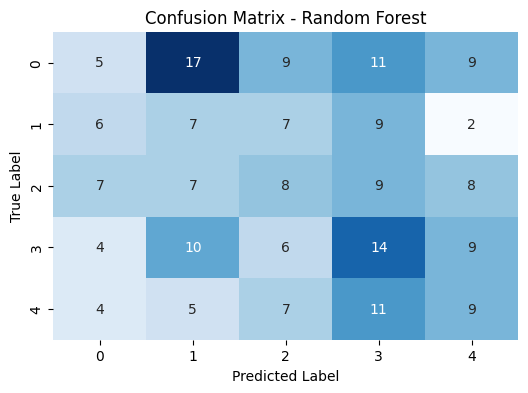

In [58]:
# Random Forest Confusion Matrix
plot_confusion_matrix(y_test, rf_predictions, title="Random Forest")

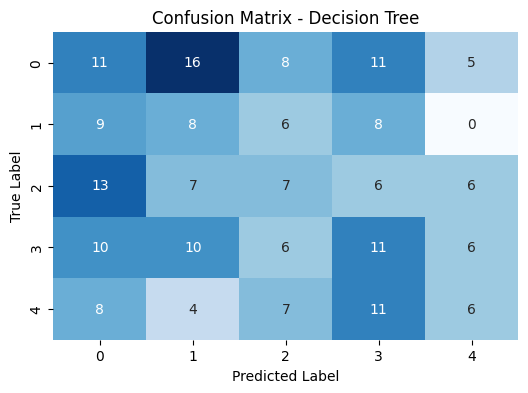

In [59]:
# Decision Tree Confusion Matrix
plot_confusion_matrix(y_test, dt_predictions, title="Decision Tree")

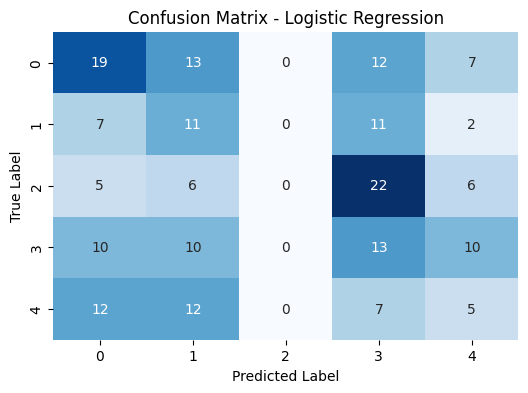

In [60]:
# Logistic Regression Confusion Matrix
plot_confusion_matrix(y_test, lr_predictions, title="Logistic Regression")

In [61]:
import joblib

# Save the logistic regression model to a file
joblib.dump(lr_model, 'logistic_regression_model.pkl')

print("Logistic Regression model saved as 'logistic_regression_model.pkl'")

Logistic Regression model saved as 'logistic_regression_model.pkl'


In [62]:
# Save the LabelEncoder for 'Herbicide_Name'
joblib.dump(label_encoder, 'label_encoder.pkl')

# Save the OneHotEncoder for input variables
joblib.dump(df_encoded.columns, 'onehot_encoder_columns.pkl')  # Save the one-hot encoded columns as reference

print("LabelEncoder and OneHotEncoder column names saved.")

LabelEncoder and OneHotEncoder column names saved.


In [63]:
import pandas as pd
import joblib

# Step 1: Load the saved logistic regression model, label encoder, and one-hot encoded columns
loaded_model = joblib.load('logistic_regression_model.pkl')
loaded_label_encoder = joblib.load('label_encoder.pkl')
onehot_encoded_columns = joblib.load('onehot_encoder_columns.pkl')

# Step 2: Input new sample data (modify this with your own sample data)
sample_data = pd.DataFrame({
    'Weed_Variety': ['Cyperus rotundus'],          # Replace with actual sample value
    'Application_Rate': ['1.2 L/ha'],           # Replace with actual sample value
    'Effectiveness': ['Medium'],         # Replace with actual sample value
})

# Step 3: One-hot encode the sample data using the previously saved column structure
sample_data_encoded = pd.get_dummies(sample_data).reindex(columns=onehot_encoded_columns, fill_value=0)

# Step 4: Use the loaded model to make predictions on the sample data
predicted_class = loaded_model.predict(sample_data_encoded)

# Step 5: Decode the predicted class back to the original herbicide name using the loaded label encoder
predicted_label = loaded_label_encoder.inverse_transform(predicted_class)

# Step 6: Print the prediction result
print(f'Predicted Herbicide: {predicted_label[0]}')

Predicted Herbicide: 2,4-D
